In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import U-shape dataset from Kaggle
# Method 1: Direct download using Kaggle API (requires kaggle package and API token)
try:
    import kaggle

    # Download the dataset
    kaggle.api.dataset_download_files(
        "saifullah57/ushape-dataset", path=".", unzip=True
    )
    print("Dataset downloaded successfully using Kaggle API")
except ImportError:
    print("Kaggle package not found. Install with: pip install kaggle")
except Exception as e:
    print(f"Error downloading with Kaggle API: {e}")
    print("Trying alternative method...")

# Method 2: Load the dataset if already downloaded or use direct URL
try:
    # Try to load from local file first
    df = pd.read_csv("ushape.csv")
    print("Dataset loaded from local file")
except FileNotFoundError:
    try:
        # Alternative: Direct URL (if publicly accessible)
        url = "https://www.kaggle.com/datasets/saifullah57/ushape-dataset/download?datasetVersionNumber=1"
        print(
            "Note: For direct URL download, you may need to manually download the file"
        )
        print("Visit: https://www.kaggle.com/datasets/saifullah57/ushape-dataset")

        # For now, let's create sample U-shaped data for demonstration
        print("Creating sample U-shaped data for demonstration...")
        np.random.seed(42)
        x = np.linspace(-2, 2, 1000)
        y = x**2 + np.random.normal(0, 0.1, 1000)

        # Create sample dataset
        df = pd.DataFrame(
            {
                "x": x,
                "y": y,
                "label": (y > np.median(y)).astype(
                    int
                ),  # Binary classification based on y values
            }
        )
        print("Sample U-shaped dataset created")

    except Exception as e:
        print(f"Error: {e}")

Error downloading with Kaggle API: Could not find kaggle.json. Make sure it's located in C:\Users\Raghav\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Trying alternative method...
Note: For direct URL download, you may need to manually download the file
Visit: https://www.kaggle.com/datasets/saifullah57/ushape-dataset
Creating sample U-shaped data for demonstration...
Sample U-shaped dataset created


In [3]:
df.head()

,x,y,label
0,-2.000000,4.049671,1
1,-1.995996,3.970174,1
2,-1.991992,4.032801,1
3,-1.987988,4.104399,1
4,-1.983984,3.912777,1


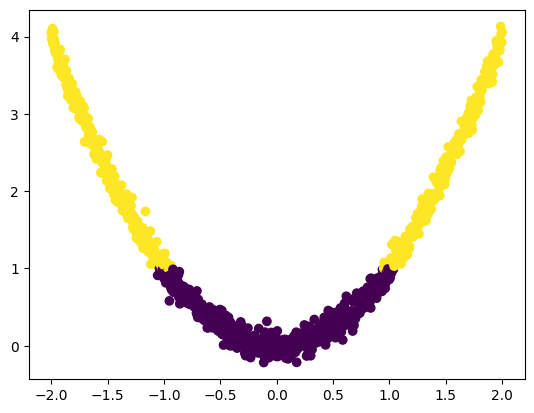

In [4]:
plt.scatter(df["x"], df["y"], c=df["label"])

In [5]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10, activation="sigmoid", input_dim=2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

C:\Users\Raghav\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.44708806,  0.21834058,  0.5275703 ,  0.5705318 , -0.27376536,
         -0.4120259 ,  0.60470444, -0.23505095,  0.05820024, -0.17281741],
        [ 0.36830598,  0.3182029 ,  0.26881665, -0.24067265,  0.3693952 ,
          0.3639714 ,  0.41373855, -0.31013253,  0.03648806,  0.28318417]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.12040222],
        [-0.2018649 ],
        [ 0.5940526 ],
        [-0.00740576],
        [-0.58467335],
        [ 0.10936385],
        [-0.01103377],
        [ 0.26930505],
        [-0.10089087],
        [-0.3637657 ]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
history = model.fit(x, y, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6859 - val_accuracy: 0.0000e+00 - val_loss: 0.7607
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6731 - val_accuracy: 0.0000e+00 - val_loss: 0.8158
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 0.6628 - val_accuracy: 0.0000e+00 - val_loss: 0.8664
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6536 - val_accuracy: 0.0000e+00 - val_loss: 0.9113
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6449 - val_accuracy: 0.0000e+00 - val_loss: 0.9566
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.6361 - val_accuracy: 0.0000e+00 - val_loss: 0.9941
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6273 - val_accuracy: 0.0000e+00 - val_loss: 1.0291
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.618

In [16]:
model.get_weights()

[array([[ 0.11857046,  0.11857046,  0.11857046,  0.11857046,  0.11857046,
          0.11857046,  0.11857046,  0.11857046,  0.11857046,  0.11857046],
        [-2.0587504 , -2.0587504 , -2.0587504 , -2.0587504 , -2.0587504 ,
         -2.0587504 , -2.0587504 , -2.0587504 , -2.0587504 , -2.0587504 ]],
       dtype=float32),
 array([0.68165183, 0.68165183, 0.68165183, 0.68165183, 0.68165183,
        0.68165183, 0.68165183, 0.68165183, 0.68165183, 0.68165183],
       dtype=float32),
 array([[-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536],
        [-1.037536]], dtype=float32),
 array([1.6927019], dtype=float32)]

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype("int"), clf=model, legend=2)

ModuleNotFoundError: No module named 'mlxtend'